In [87]:
import seaborn

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
from datetime import datetime, timedelta
sns.set_style("darkgrid")
sns.set_palette("pastel")

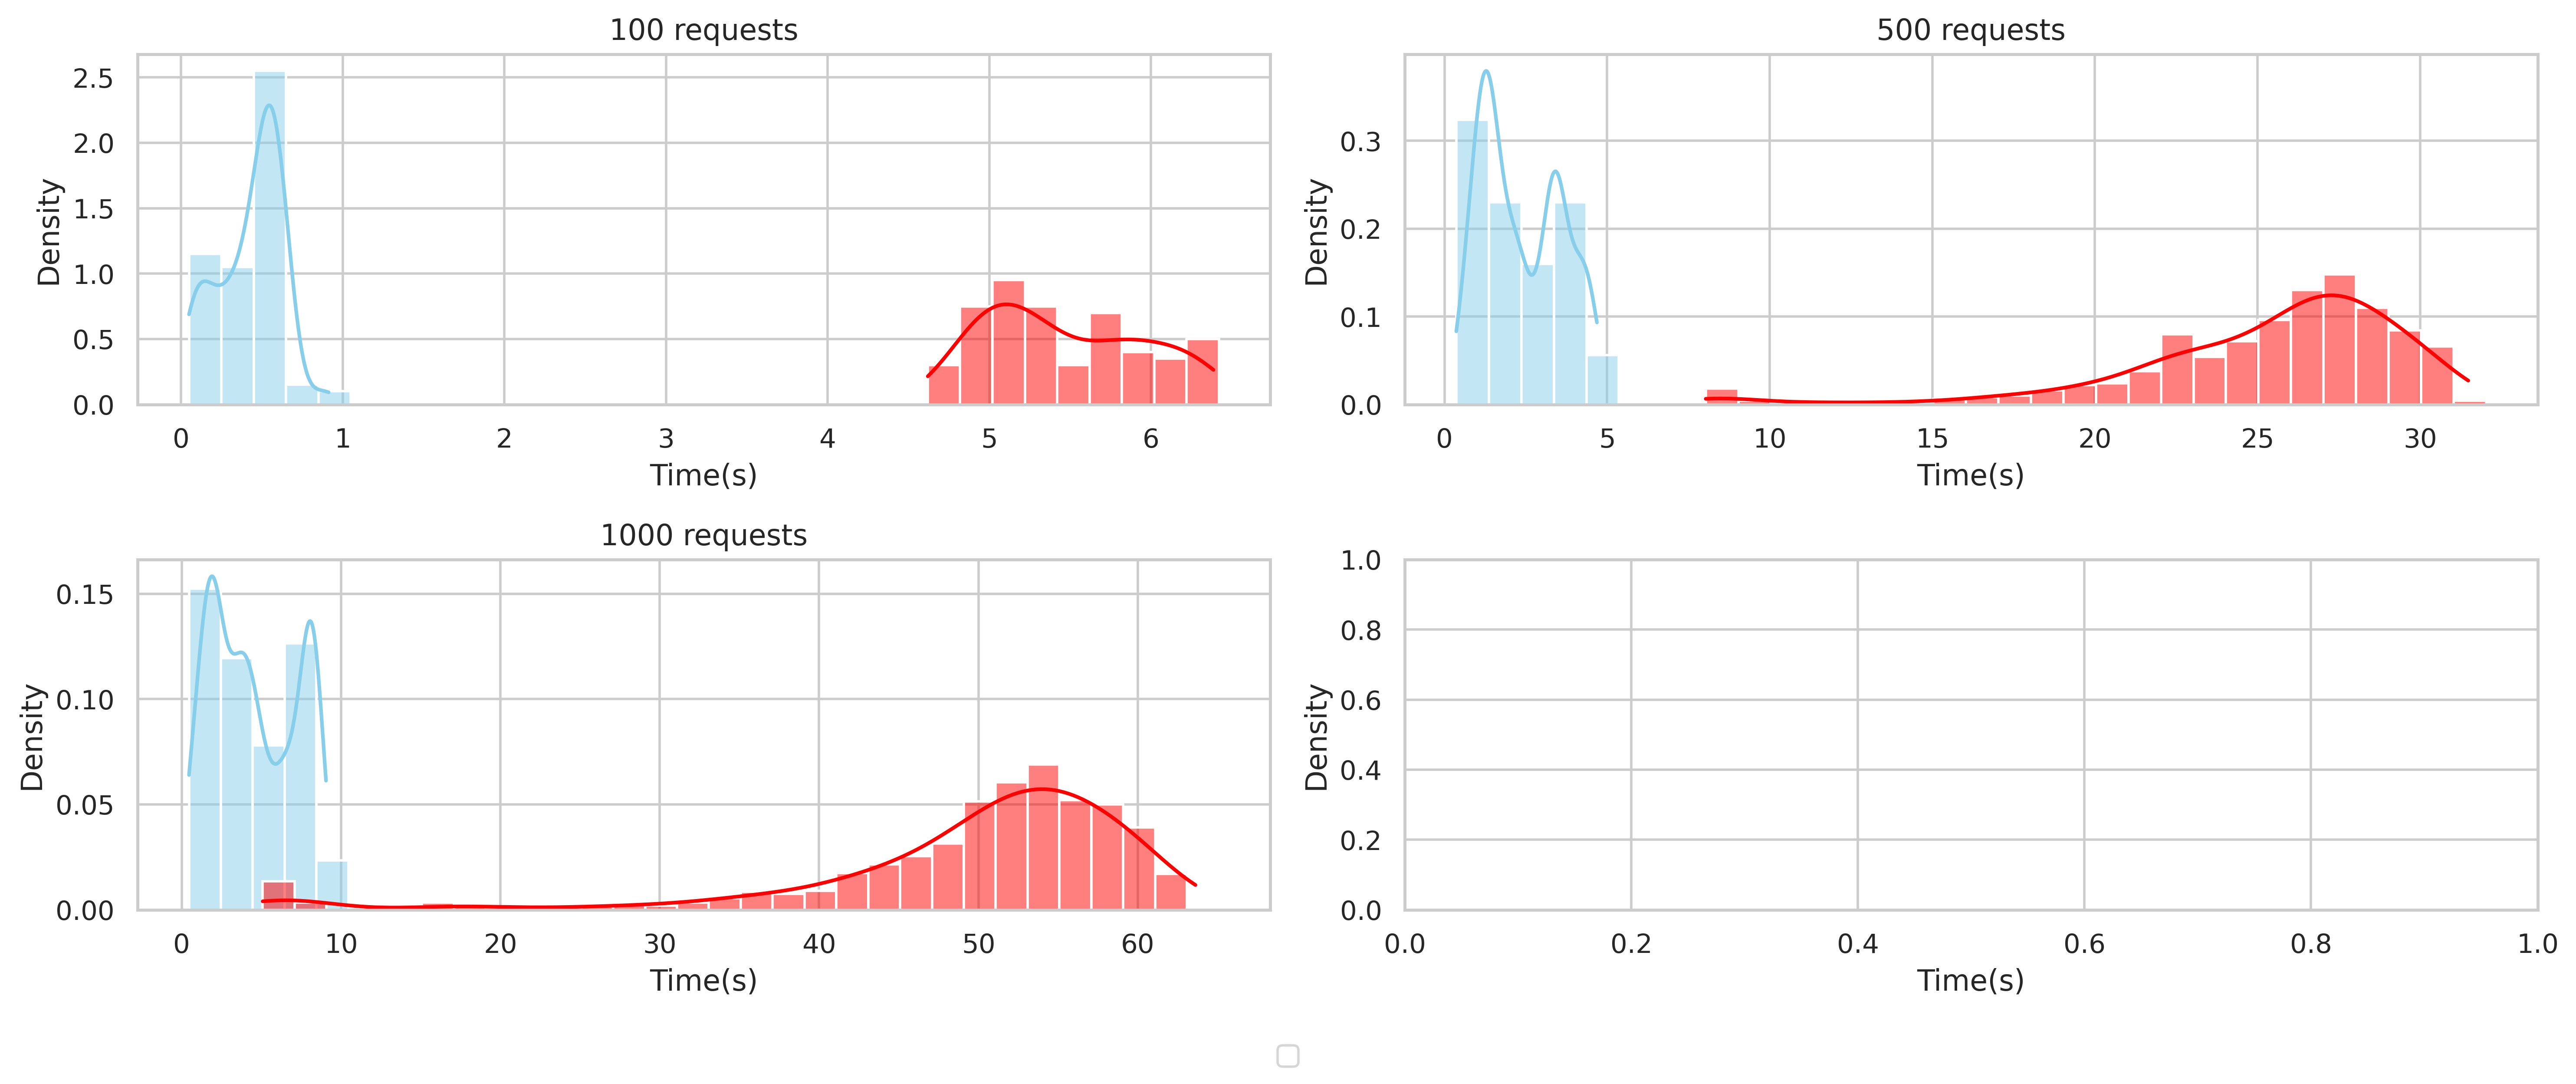

In [89]:
import matplotlib.pyplot as plt
import numpy as np
# Some example data to display
#x = np.linspace(0, 2 * np.pi, 400)
#y = np.sin(x ** 2)

sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,2, figsize = (15,6),  dpi=400)

df100 = pd.read_csv('results_100.csv')
df100["elapsed"] = df100["elapsed"]/1000
colors = ['red', 'tan', 'lime']
sns.histplot(df100[df100.URL == "https://ecoretail.tk/api/process-purchase/"], x='elapsed',stat="density", binwidth=0.2, color="skyblue", label="process-puchase", kde=True, ax=axs[0, 0]).set( xlabel='Time(ms)', title='100 requests')
sns.histplot(df100[df100.URL == "https://ecoretail.tk/api/send-txn/"], x='elapsed',stat="density", binwidth=0.2, color="red",label="send-txn", kde=True,  ax=axs[0, 0]).set( xlabel='Time(ms)')


df500 = pd.read_csv('results_500.csv')
df500["elapsed"] = df500["elapsed"]/1000
sns.histplot(df500[df500.URL == "https://ecoretail.tk/api/process-purchase/"], x='elapsed',stat="density", binwidth=1.0, color="skyblue", label="process-puchase", kde=True,  ax=axs[0, 1]).set( xlabel='Time(s)', title='500 requests')
sns.histplot(df500[df500.URL == "https://ecoretail.tk/api/send-txn/"], x='elapsed',stat="density", color="red", binwidth=1.0, label="send-txn", kde=True,  ax=axs[0, 1]).set( xlabel='Time(s)')

df1000 = pd.read_csv('results_1000.csv')
df1000["elapsed"] = df1000["elapsed"]/1000
sns.histplot(df1000[df1000.URL == "https://ecoretail.tk/api/process-purchase/"], x='elapsed',stat="density", binwidth=2.0, color="skyblue", label="process-puchase", kde=True, ax=axs[1, 0]).set( xlabel='Time(s)', title='1000 requests')
sns.histplot(df1000[df1000.URL == "https://ecoretail.tk/api/send-txn/"], x='elapsed',stat="density", color="red", binwidth=2.0, label="send-txn", kde=True, ax=axs[1, 0]).set( xlabel='Time(s)')

for ax in axs.flat:
    ax.set(xlabel='Time(s)', ylabel='Density')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05))
fig.tight_layout()

In [90]:
df500 = pd.read_csv('results_500.csv')
df500["elapsed"] = df500["elapsed"]/1000

df500[df500.URL == "https://ecoretail.tk/api/send-txn/"]["elapsed"].describe().round(2)

count    500.00
mean      25.33
std        4.31
min        8.03
25%       23.45
50%       26.41
75%       28.17
max       31.48
Name: elapsed, dtype: float64

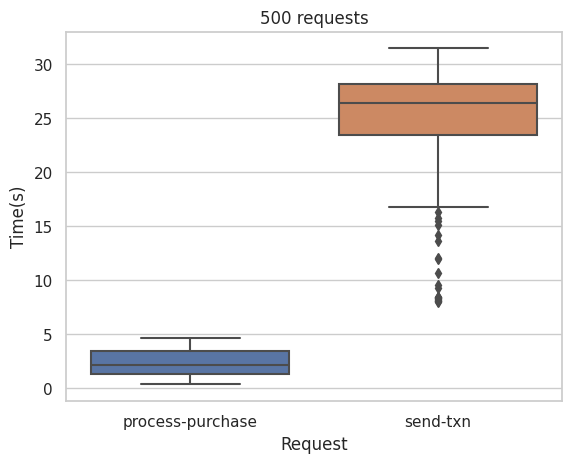

In [91]:
df = pd.read_csv('results_500.csv')
df["elapsed"] = df["elapsed"]/1000
df['labelCol'] = df['URL']
df.loc[df['URL'] == 'https://ecoretail.tk/api/process-purchase/', 'labelCol'] = 'process-purchase'
df.loc[df['URL'] == 'https://ecoretail.tk/api/send-txn/', 'labelCol'] = 'send-txn'
sns.boxplot(data=df, x='labelCol', y='elapsed').set( ylabel='Time(s)', xlabel='Request',title='500 requests')

plt.show()

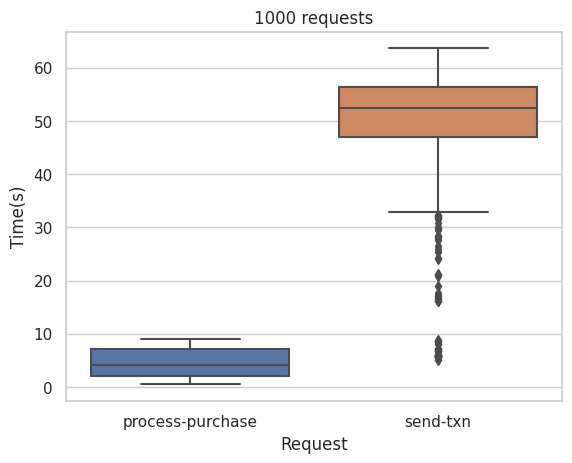

In [92]:
df = pd.read_csv('results_1000.csv')
df["elapsed"] = df["elapsed"]/1000
df['labelCol'] = df['URL']
df.loc[df['URL'] == 'https://ecoretail.tk/api/process-purchase/', 'labelCol'] = 'process-purchase'
df.loc[df['URL'] == 'https://ecoretail.tk/api/send-txn/', 'labelCol'] = 'send-txn'
sns.boxplot(data=df, x='labelCol', y='elapsed').set( ylabel='Time(s)', xlabel='Request',title='1000 requests')

plt.show()

In [93]:
df = pd.read_csv('results_100.csv')
df["elapsed"] = df["elapsed"]/1000
purchases=(df[df['URL']=='https://ecoretail.tk/api/process-purchase/']['elapsed']).reset_index()
send_txns=(df[df['URL']=='https://ecoretail.tk/api/send-txn/']['elapsed']).reset_index()
total100 = purchases.add(send_txns, fill_value=0)
df = pd.read_csv('results_500.csv')
df["elapsed"] = df["elapsed"]/1000
purchases=(df[df['URL']=='https://ecoretail.tk/api/process-purchase/']['elapsed']).reset_index()
send_txns=(df[df['URL']=='https://ecoretail.tk/api/send-txn/']['elapsed']).reset_index()
total500 = purchases.add(send_txns, fill_value=0)
df = pd.read_csv('results_1000.csv')
df["elapsed"] = df["elapsed"]/1000
purchases=(df[df['URL']=='https://ecoretail.tk/api/process-purchase/']['elapsed']).reset_index()
send_txns=(df[df['URL']=='https://ecoretail.tk/api/send-txn/']['elapsed']).reset_index()
total1000 = purchases.add(send_txns, fill_value=0)




<AxesSubplot: xlabel='elapsed', ylabel='Density'>

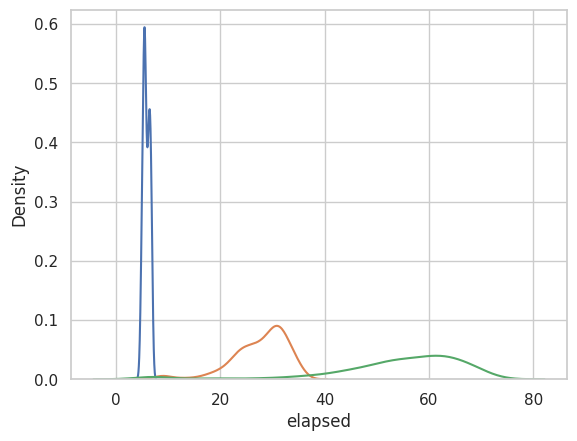

In [94]:
sns.kdeplot(data=total100, x="elapsed")
sns.kdeplot(data=total500, x="elapsed")
sns.kdeplot(data=total1000, x="elapsed")

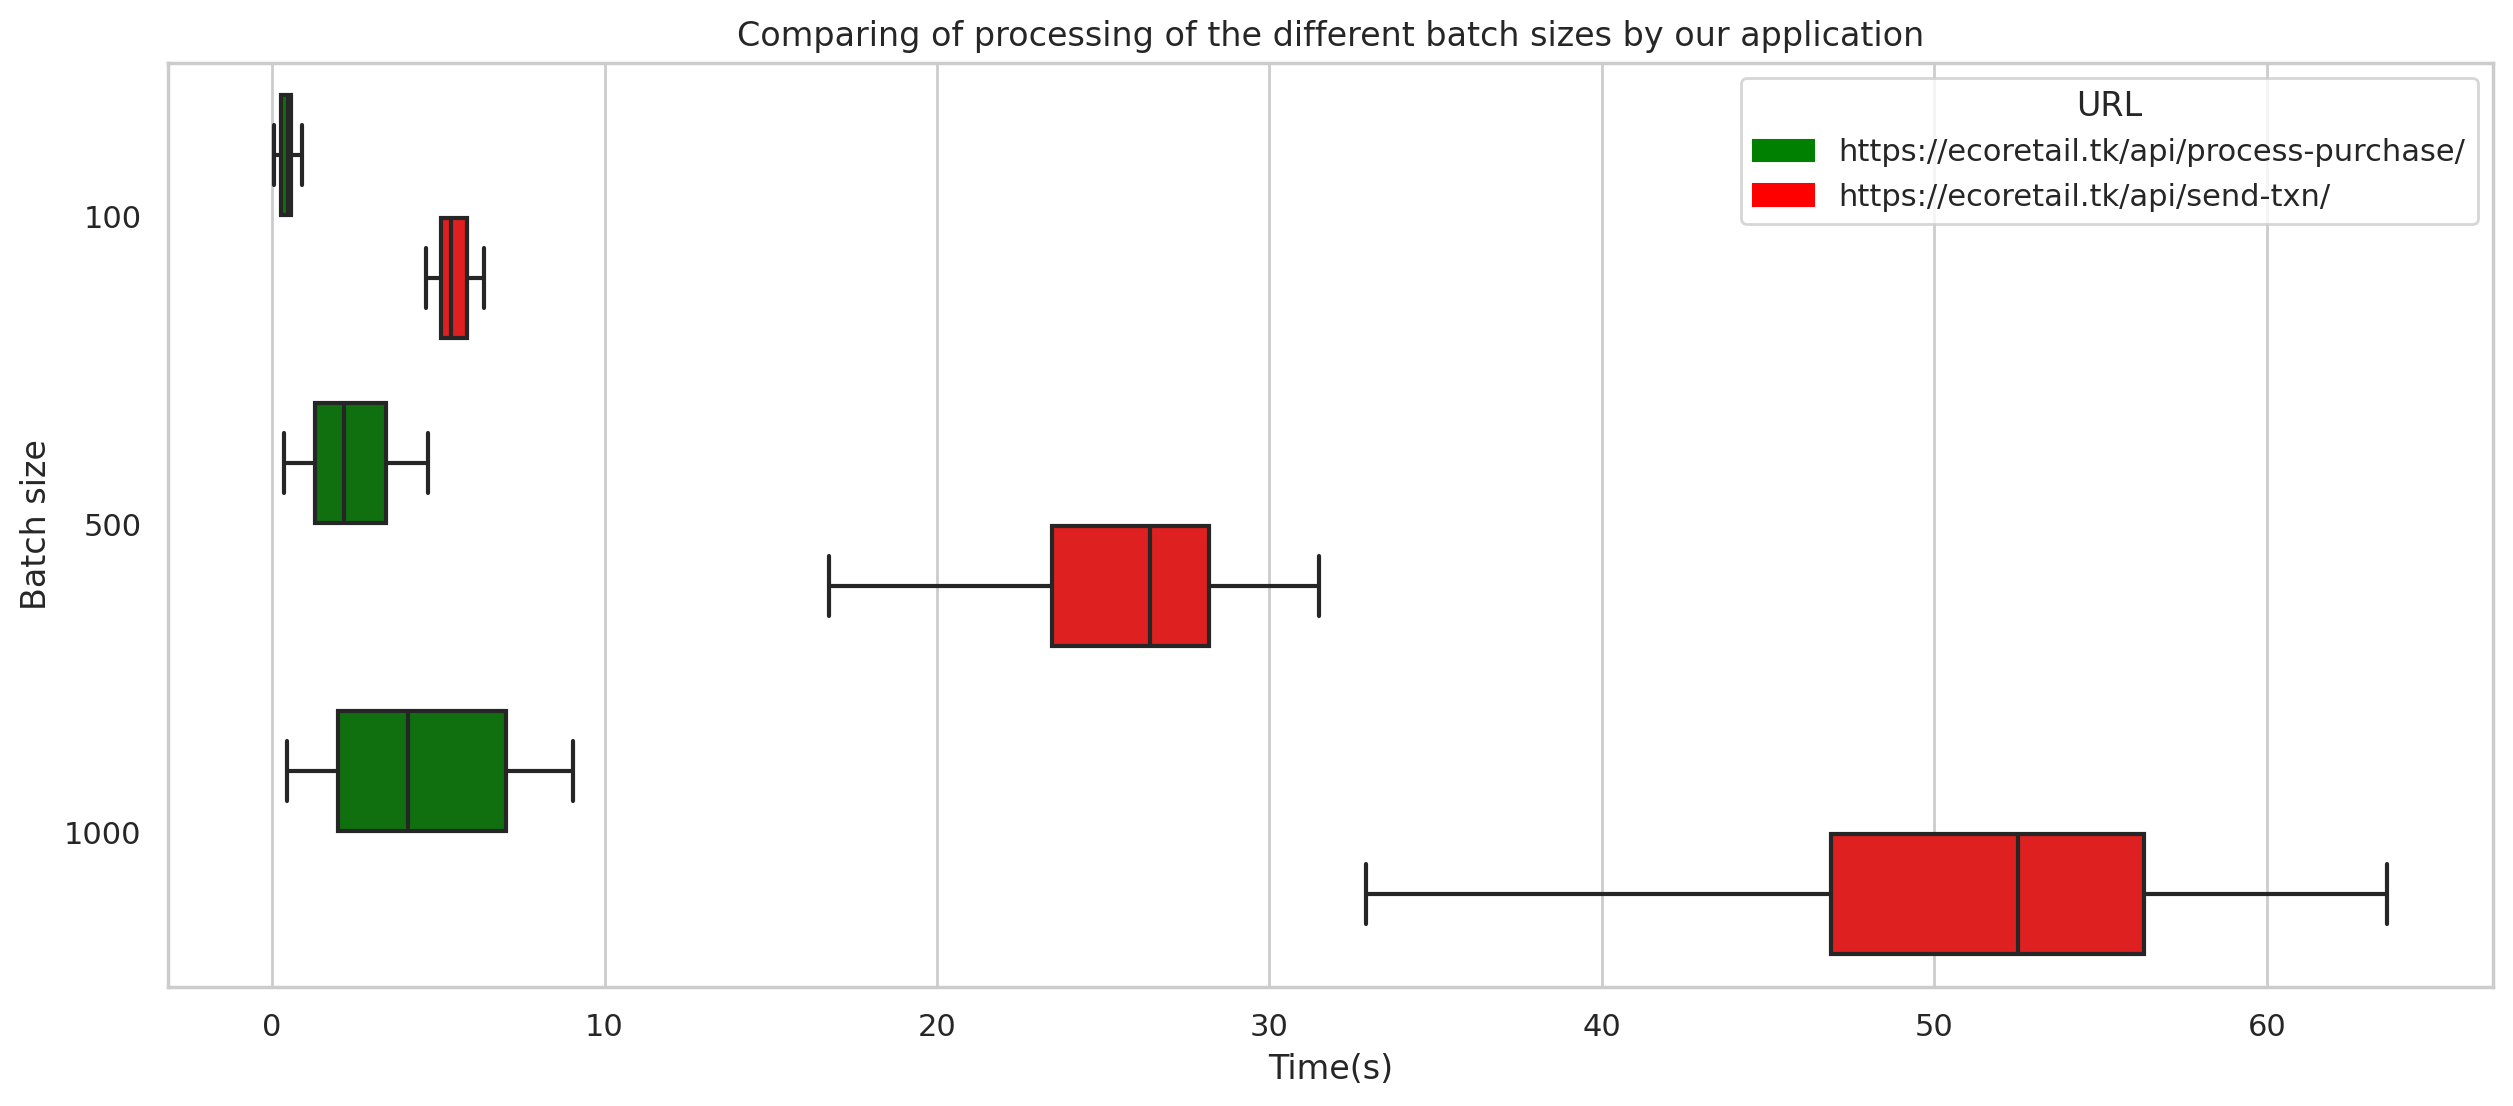

In [95]:

 # Plot the orbital period with horizontal boxes
plt.figure(figsize=(15,6), dpi=200)
df100 = pd.read_csv('results_100.csv')
df100["elapsed"] = df100["elapsed"]/1000
t100=(df100[['elapsed','URL']]).reset_index()

df500 = pd.read_csv('results_500.csv')
df500["elapsed"] = df500["elapsed"]/1000
t500=(df500[['elapsed','URL']]).reset_index()

df1000 = pd.read_csv('results_1000.csv')
df1000["elapsed"] = df1000["elapsed"]/1000
t1000=(df1000[['elapsed','URL']]).reset_index()

t100['label'] = 100
t500['label'] = 500
t1000['label'] = 1000
tAll = pd.concat((t100, t500, t1000))
tAll.astype({'label':'int'})

sns.boxplot(data=tAll, x='elapsed', y='label', orient='h', hue='URL', palette=['green', 'red'], showfliers=False).set(xlabel="Time(s)", ylabel="Batch size", title="Comparing of processing of the different batch sizes by our application")

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('red')
plt.show()

In [96]:
t12000_at_start="01:36:51(28912472)"
t12000_at_end="01:37:57(28912491)"
t8000_at_start="01:21:13(28864575)"
t8000_at_end="01:22:21(28864594)"
t4000_at_start="01:00:38(28864233)"
t4000_at_end="01:01:03(28864240)"
t2000_at_start="23:43:13(28910594)"
t2000_at_end="23:43:24(28910597)"
t1000_at_start="00:00:20(28910877)"
t1000_at_end="00:00:28(28910879)"
t120001_at_start="00:40:46(29030746)"
t120001_at_end="00:41:56(29030765)"
t80001_at_start="01:11:16(29031251)"
t80001_at_end="01:12:08(29031265)"



In [97]:
send_txs = [[1000, '2023-04-05 00:00:20', '2023-04-05 00:00:28', 28910877, 28910879], 
            [2000, '2023-04-04 23:43:13', '2023-04-04 23:43:24', 28910594, 28910597], 
            [4000, '2023-04-03 01:00:38', '2023-04-03 01:01:03', 28864233, 28864240], 
            [8000, '2023-04-10 01:11:16', '2023-04-10 01:12:08', 29031251, 29031265], 
            [12000, '2023-04-10 00:40:46', '2023-04-10 00:41:56', 29030746, 29030765]]
df_send_txs = pd.DataFrame(send_txs, columns=['Batch size', 'Start time', 'End time','First block', 'Last block'])
df_send_txs['Start time'] = pd.to_datetime(df_send_txs['Start time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df_send_txs['End time'] = pd.to_datetime(df_send_txs['End time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df_send_txs['Start time'].dt.time
df_send_txs['Elapsed time'] = df_send_txs['End time'] - df_send_txs['Start time']
df_send_txs['Elapsed time'] = df_send_txs['Elapsed time'].dt.total_seconds()
df_send_txs['Number of blocks'] = df_send_txs['Last block'] - df_send_txs['First block']
#df_send_txs['avg'] = (df_send_txs['elapsed'] / df_send_txs['Batch size'])*1000
df_send_txs['TPS'] = df_send_txs['Batch size'] / df_send_txs['Elapsed time']
df_send_txs
  

,Batch size,Start time,End time,First block,Last block,Elapsed time,Number of blocks,TPS
0,1000,2023-04-05 00:00:20,2023-04-05 00:00:28,28910877,28910879,8.0,2,125.000000
1,2000,2023-04-04 23:43:13,2023-04-04 23:43:24,28910594,28910597,11.0,3,181.818182
2,4000,2023-04-03 01:00:38,2023-04-03 01:01:03,28864233,28864240,25.0,7,160.000000
3,8000,2023-04-10 01:11:16,2023-04-10 01:12:08,29031251,29031265,52.0,14,153.846154
4,12000,2023-04-10 00:40:46,2023-04-10 00:41:56,29030746,29030765,70.0,19,171.428571


([<matplotlib.axis.YTick at 0x7f2f978ca020>,
 [Text(0, 0, '0'),
  Text(0, 2, '2'),
  Text(0, 4, '4'),
  Text(0, 6, '6'),
  Text(0, 8, '8'),
  Text(0, 10, '10'),
  Text(0, 12, '12'),
  Text(0, 14, '14'),
  Text(0, 16, '16'),
  Text(0, 18, '18')])

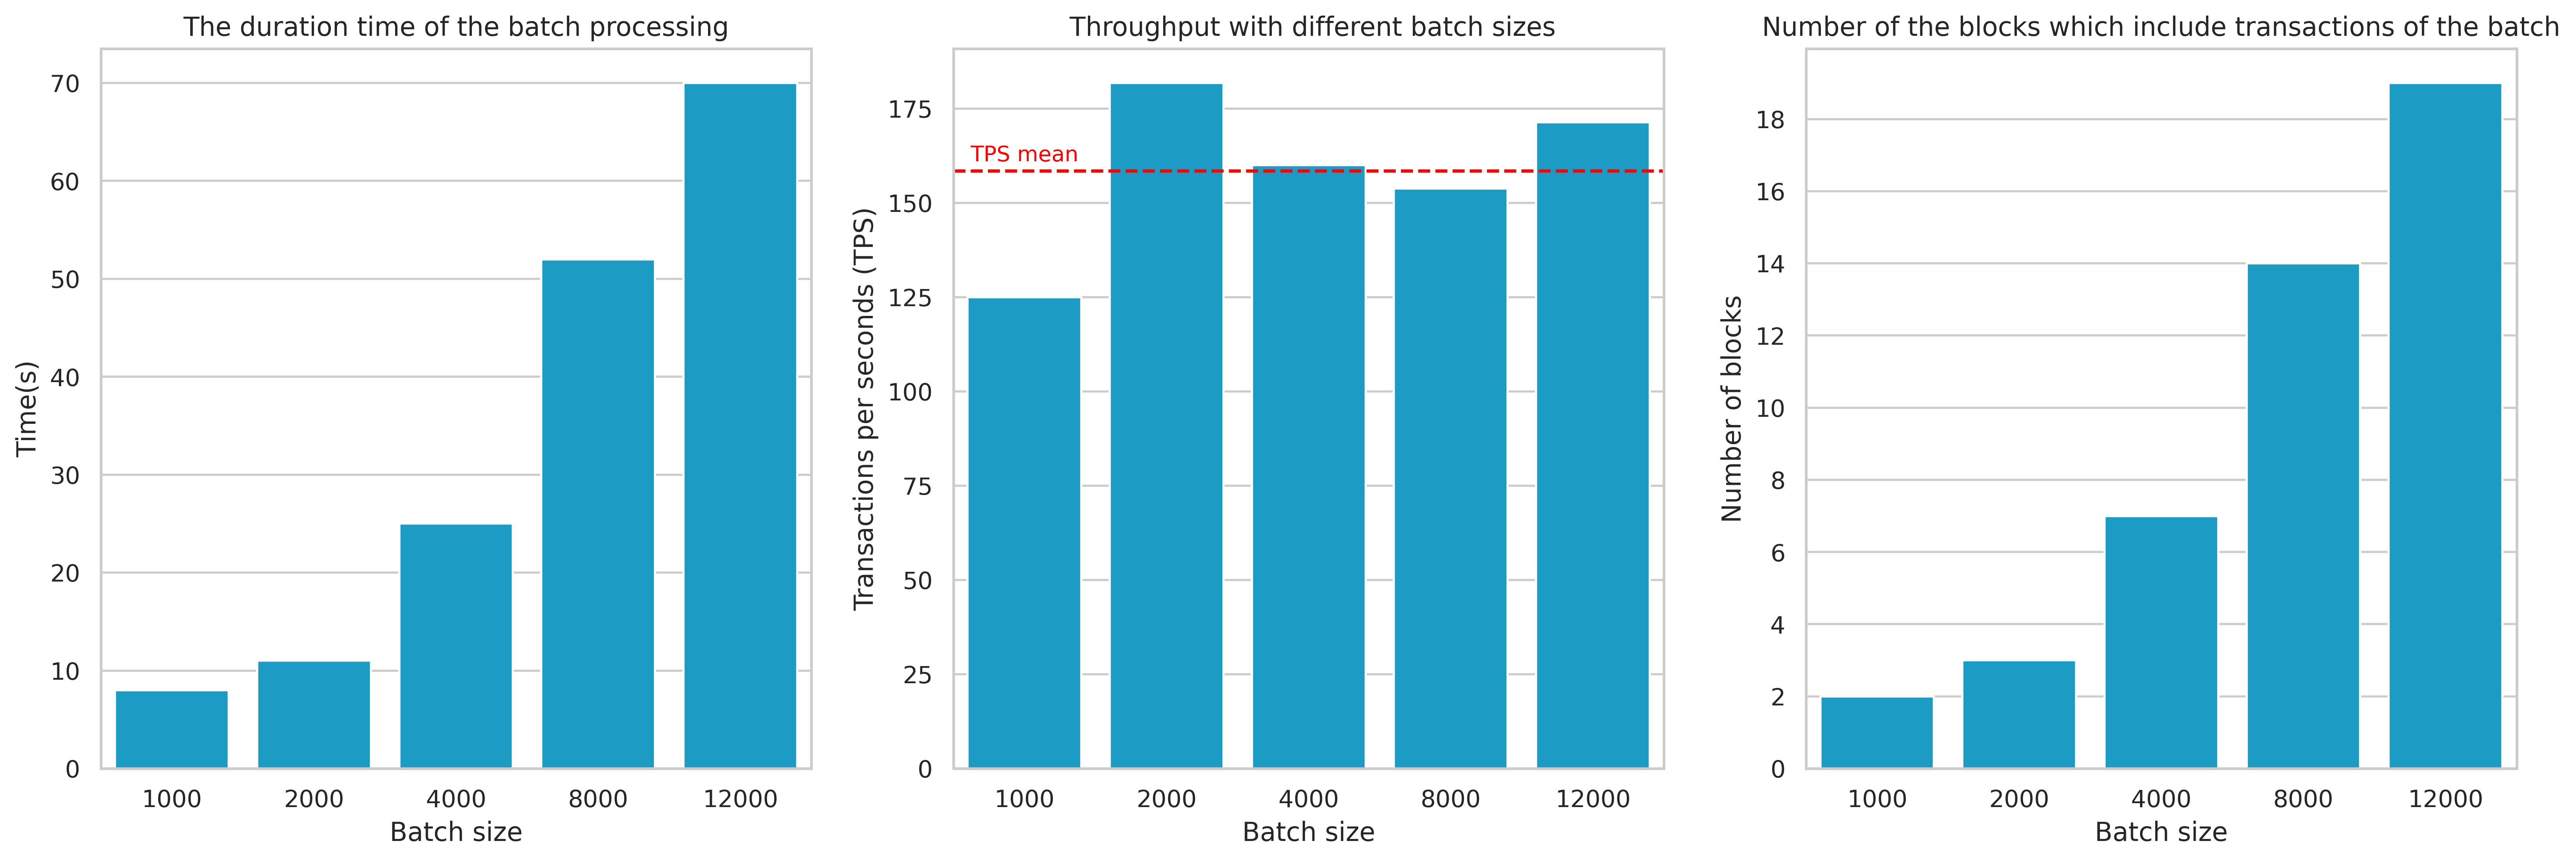

In [105]:
fig,axs = plt.subplots(1,3, figsize = (20,6),  dpi=400)

sns.barplot(data=df_send_txs, x='Batch size', y='Elapsed time', color='#00a9e0', ax=axs[0]).set( xlabel='Batch size', ylabel='Time(s)', title='The duration time of the batch processing')
g=sns.barplot(data=df_send_txs, x='Batch size', y='TPS', ax=axs[1], color='#00a9e0')
g.axhline(158.42,color='red', label="Mean TPS", linestyle='--')
g.set( xlabel='Batch size', ylabel='Transactions per seconds (TPS)', title=' Throughput with different batch sizes')
sns.barplot(data=df_send_txs, x='Batch size', y='Number of blocks', ax=axs[2], color='#00a9e0').set( xlabel='Batch size', ylabel='Number of blocks', title="Number of the blocks which include transactions of the batch")
plt.text(-6, 17, 'TPS mean', fontsize=10, va='center', ha='center', color='red')
plt.yticks(np.arange(0, 20, 2))
